In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [387]:
df = pd.read_csv('../experiments/sw-data/AMD_Ryzen_7_5800X.csv')

df['throughput'] = df['bytes_in'] / df['time']
# df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
display(df)


,framework,api,allocated,max_values,num_jsons,bytes_in,bytes_out,time,throughput
0,simdjson,DOM,False,1,7271551,134217732,58172400,0.262584,5.111421e+08
1,simdjson,DOM,True,1,7271551,134217732,58172400,0.241939,5.547586e+08
2,simdjson,DOM (no keys),True,1,7271551,134217732,58172400,0.234671,5.719400e+08
3,RapidJSON,DOM,False,1,7271551,134217732,58172400,0.595663,2.253249e+08
4,RapidJSON,DOM (in situ),False,1,7271551,134217732,58172400,0.538852,2.490809e+08
...,...,...,...,...,...,...,...,...,...
103,Custom,NaN,True,256,228976,134218013,235110176,0.176542,7.602611e+08
104,Custom,NaN,False,256,228976,134218013,235110176,0.187489,7.158714e+08
105,Custom,NaN,False,256,228976,134218013,235110176,0.185281,7.244025e+08
106,ANTLR4,NaN,False,256,228976,134218013,235110176,15.985700,8.396130e+06


In [388]:
dg = df.groupby(['framework', 'max_values', 'bytes_in', 'bytes_out']).agg({'throughput':'max'})
dg.sort_values(by=['framework', 'max_values'], inplace=True)
dg['Throughput (GB/s)'] = dg.throughput * 1e-9
del dg['throughput']
display(dg)


Throughput (GB/s)
framework       max_values bytes_in  bytes_out                   
ANTLR4          1          134217732 58172400            0.011135
                2          134217737 77846056            0.010575
                4          134217740 106981184           0.010359
                8          134217764 142137952           0.009455
                16         134217768 176011712           0.009058
                32         134217827 202386616           0.008687
                64         134217903 219658600           0.008597
                128        134217816 229692704           0.008551
                256        134218013 235110176           0.008396
Boost Spirit.X3 1          134217732 58172400            0.897087
                2          134217737 77846056            0.738227
                4          134217740 106981184           0.628425
                8          134217764 142137952           0.524544
                16         134217768 176011712           0.485375
                32         134217827 202386616           0.446157
                64         134217903 219658600           0.437273
                128        134217816 229692704           0.429889
                256        134218013 235110176           0.425589
Custom          1          134217732 58172400            2.343714
                2          134217737 77846056            1.806352
                4          134217740 106981184           1.350085
                8          134217764 142137952           1.095763
                16         134217768 176011712           0.936399
                32         134217827 202386616           0.842399
                64         134217903 219658600           0.798778
                128        134217816 229692704           0.773011
                256        134218013 235110176           0.760261
RapidJSON       1          134217732 58172400            0.535276
                2          134217737 77846056            0.504220
                4          134217740 106981184           0.477939
                8          134217764 142137952           0.466661
                16         134217768 176011712           0.455372
                32         134217827 202386616           0.450710
                64         134217903 219658600           0.450648
                128        134217816 229692704           0.455326
                256        134218013 235110176           0.450706
simdjson        1          134217732 58172400            0.571940
                2          134217737 77846056            0.610316
                4          134217740 106981184           0.559964
                8          134217764 142137952           0.503095
                16         134217768 176011712           0.473246
                32         134217827 202386616           0.466143
                64         134217903 219658600           0.457710
                128        134217816 229692704           0.458186
                256        134218013 235110176           0.456511

In [389]:
dh = dg.unstack('framework')
dh.index.rename(inplace=True, names=['Max. values', 'Bytes in', 'Bytes out'])
dh = dh.droplevel(0, axis=1)
display(dh)

,,framework,ANTLR4,Boost Spirit.X3,Custom,RapidJSON,simdjson
Max. values,Bytes in,Bytes out,,,,,
1,134217732,58172400,0.011135,0.897087,2.343714,0.535276,0.571940
2,134217737,77846056,0.010575,0.738227,1.806352,0.504220,0.610316
4,134217740,106981184,0.010359,0.628425,1.350085,0.477939,0.559964
8,134217764,142137952,0.009455,0.524544,1.095763,0.466661,0.503095
16,134217768,176011712,0.009058,0.485375,0.936399,0.455372,0.473246
32,134217827,202386616,0.008687,0.446157,0.842399,0.450710,0.466143
64,134217903,219658600,0.008597,0.437273,0.798778,0.450648,0.457710
128,134217816,229692704,0.008551,0.429889,0.773011,0.455326,0.458186
256,134218013,235110176,0.008396,0.425589,0.760261,0.450706,0.456511


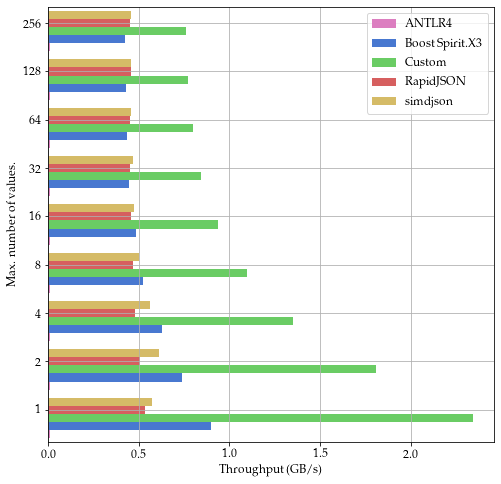

In [390]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 12
})

#dh.columns.rename(inplace=True, name='Framework')
#dh.index.rename(inplace=True, name='Max. values')

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#dc7ec0', '#4878d0', '#6acc64', '#d65f5f', '#d5bb67']

y_labels = [x[0] for x in dh.index.to_list()]
y_ticks = np.arange(0, len(y_labels))

impls = dh.columns.to_list()
bars = []
height = 1/(len(impls)+1)

for i, impl in enumerate(impls):
    x = dh[impl].to_numpy()
    y = np.arange(0, len(x))

    b = ax.barh(y=y+i*height, width=x, height=height, color=colors[i])
    bars.append(b)

ax.set_ylim(-height, len(y_labels)-height)

ax.set_yticks(y_ticks + 0.5)
ax.set_yticklabels(y_labels)
ax.set_ylabel("Max. number of values.")

ax.set_xlabel("Throughput (GB/s)")

ax.grid(which='both')

ax.legend(bars, impls)